# Census Data

Load the data file and run the imports

In [86]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

census_data = pd.read_csv ('adult.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"




## Review of the data

In [71]:
census_data.describe()



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


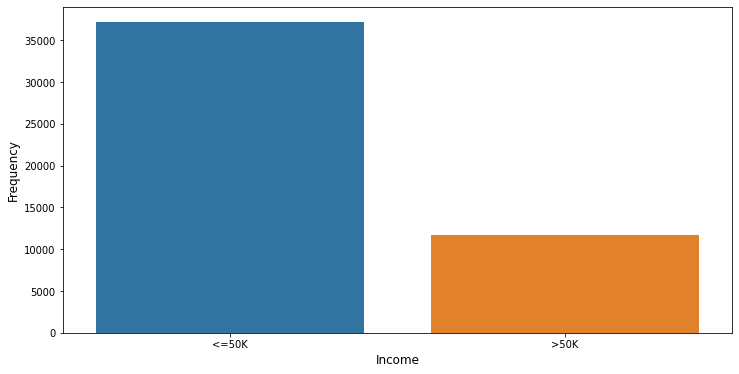

In [72]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = census_data);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

In [73]:

census_data['income'] = census_data['income'].apply(lambda x: 0 if x == '<=50K' else (1 if x == '>50K' else -1))

#print(census_data)

census_data_onehot = census_data.copy()
#census_data_onehot = pd.get_dummies(census_data_onehot, columns=['workclass'], prefix = ['workclass'])
census_data_onehot['workclass'] = census_data_onehot['workclass'].astype('category')  
census_data_onehot['workclass'] = census_data_onehot['workclass'].cat.codes
#print(census_data_onehot.head())

census_data_onehot['gender'] = census_data_onehot['gender'].astype('category')  
census_data_onehot['gender'] = census_data_onehot['gender'].cat.codes

census_data_onehot['education'] = census_data_onehot['education'].astype('category')  
census_data_onehot['education'] = census_data_onehot['education'].cat.codes

census_data_onehot['marital-status'] = census_data_onehot['marital-status'].astype('category')  
census_data_onehot['marital-status'] = census_data_onehot['marital-status'].cat.codes

census_data_onehot['occupation'] = census_data_onehot['occupation'].astype('category')  
census_data_onehot['occupation'] = census_data_onehot['occupation'].cat.codes

census_data_onehot['relationship'] = census_data_onehot['relationship'].astype('category')  
census_data_onehot['relationship'] = census_data_onehot['relationship'].cat.codes

census_data_onehot['race'] = census_data_onehot['race'].astype('category')  
census_data_onehot['race'] = census_data_onehot['race'].cat.codes

census_data_onehot['native-country'] = census_data_onehot['native-country'].astype('category')  
census_data_onehot['native-country'] = census_data_onehot['native-country'].cat.codes

print(census_data_onehot.head())

profile = ProfileReport(census_data_onehot, title="Pandas")

profile.to_file(output_file="Adults_EDA_updated.html")

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          3  226802          1                7               4   
1   38          3   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          3  160323         15               10               2   
4   18         -1  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
4          -1             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[[7034  445]
 [1589  701]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      7479
           1       0.61      0.31      0.41      2290

    accuracy                           0.79      9769
   macro avg       0.71      0.62      0.64      9769
weighted avg       0.77      0.79      0.76      9769

0.7917903572525335


/Users/randyllpandohie/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


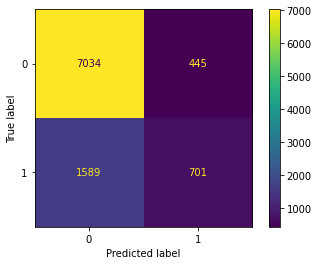

Feature: 0, Score: 0.01402
Feature: 1, Score: 0.00033
Feature: 2, Score: 0.00076
Feature: 3, Score: -0.01060
Feature: 4, Score: 0.00946
Feature: 5, Score: -0.00000
Feature: 6, Score: 0.00264
Feature: 7, Score: 0.01217
Feature: 8, Score: -0.01908
Feature: 9, Score: -0.05291
Feature: 10, Score: 0.00019
Feature: 11, Score: -0.00637
Feature: 12, Score: -0.02042
Feature: 13, Score: -0.00429


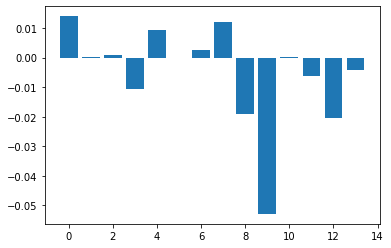

/Users/randyllpandohie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


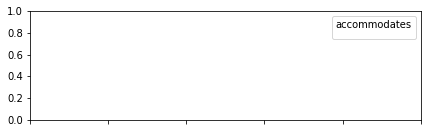

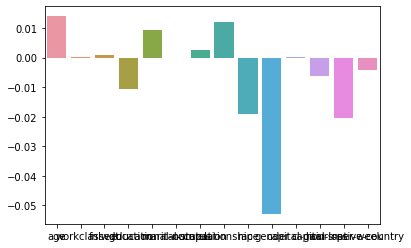

In [96]:

model = LogisticRegression(solver='liblinear', random_state=0)


#print(census_data_onehot[census_data_onehot.columns.difference(['income'])])

X_train, X_test, y_train, y_test = train_test_split(census_data_onehot[census_data_onehot.columns.difference(['income'])], census_data_onehot['income'], test_size=0.2, random_state=42)

#print(X_train)


result=model.fit(X_train, y_train)

# Step 4: Evaluate the model
p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
score_ = model.score(X_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(conf_m)
print(report)
print(score_)

plot_confusion_matrix(result, X_test, y_test)  
plt.show()

importance = model.coef_[0]


for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))

    
feature_names=[ 'age' , 'workclass'  ,'fnlwgt' , 'education',  'educational-num' , 'marital-status' , 'occupation',  'relationship','race' , 'gender',  'capital-gain','capital-loss','hours-per-week','native-country']
plt.bar([X for X in range(len(importance))], importance)
#fig=plt.bar(feature_names, importance)
plt.show()



sns.barplot(x=feature_names, y=importance)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure


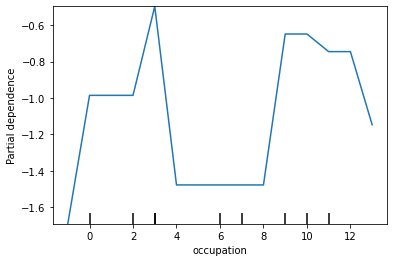

In [75]:

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
features = [0, 1]

var = 'occupation'
PartialDependenceDisplay.from_estimator(clf, X_train, [var]);


[Text(0.5, 0.9, 'X[12] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.7, 'X[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.125, 0.5, 'X[1] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.3, 'X[4] <= 8.5\ngini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.03125, 0.1, 'gini = 0.192\nsamples = 1818\nvalue = [1623, 195]'),
 Text(0.09375, 0.1, 'gini = 0.449\nsamples = 8795\nvalue = [5803, 2992]'),
 Text(0.1875, 0.3, 'X[7] <= 8.0\ngini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21875, 0.1, 'gini = 0.03\nsamples = 528\nvalue = [8, 520]'),
 Text(0.375, 0.5, 'X[1] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.3, 'X[2] <= 1782.5\ngini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.28125, 0.1, 'gini = 0.463\nsamples = 3577\nvalue = [1302, 2275]'),
 Text(0.34375, 0.1, 'gini = 0.0

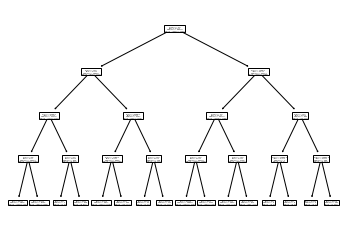

In [39]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4)

clf = clf.fit(X_train,y_train)

tree.plot_tree(clf)

In [45]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")


dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[ 'age' , 'workclass'  ,'fnlwgt' , 'education',  'educational-num' , 'marital-status' , 'occupation',  'relationship','race' , 'gender',  'capital-gain','capital-loss','hours-per-week','native-country'],  
                     class_names=['Income less than 50','Income greater than 50K'],  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

graph.render("census")

'census.pdf'

In [87]:
clf=RandomForestClassifier(n_estimators=50,max_features=5,min_samples_leaf=50)
clf.fit(X_train,y_train)

pred=clf.predict(X_test)
pred

print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

Accuracy: 86.426451 


In [88]:
#svc = SVC()
svc =SVC(C=10,decision_function_shape='ovo',kernel='rbf', degree=4, gamma='scale', coef0=0.2)
svc.fit(X_train, y_train)

pred=svc.predict(X_test)
svc.score(X_test, y_test)
svc.score(X_train, y_train)

print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

Accuracy: 80.438121 


In [90]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random

svm = OneClassSVM(kernel='rbf', gamma=0.0001, nu=0.02)
print(svm)

result = pd.concat([X_train, y_train], axis=1).reindex(X_train.index)
only_survived=result[result['income']==0]
X = only_survived.drop(columns ='income')
X

svm.fit(X)

svm = OneClassSVM(kernel='rbf', gamma=0.0001, nu=0.02)
print(svm)

svm.fit(X)

pred = svm.predict(X_test)
pred
print(pred)




OneClassSVM(gamma=0.0001, nu=0.02)
OneClassSVM(gamma=0.0001, nu=0.02)
[ 1  1 -1 ...  1  1  1]


In [95]:
type(pred)

new_pred = np.where(pred<0,1,0)
new_pred

print("Accuracy: %f " % (100*accuracy_score(y_test, new_pred)))

Accuracy: 58.849422 
